In [31]:
from sympy.physics.quantum.qubit import Qubit, IntQubit, IntQubitBra, matrix_to_qubit
from sympy.physics.quantum.dagger import Dagger
from sympy.physics.quantum.gate import Z
from sympy.physics.quantum.represent import represent

## Qubits 

### We could have also called 
Alternatively we could have also done
from sympy.physics.quantum.qubit import Qubit


In [16]:
Qubit(0,0,0)

|000>

In [17]:
q = Qubit('0101')
q

|0101>

In [18]:
q.nqubits

4

In [19]:
len(q)

4

In [20]:
q.dimension

4

In [21]:
q.flip(1)

|0111>

In [22]:
q.qubit_values

(0, 1, 0, 1)

In [23]:
Dagger(q)

<0101|

In [24]:
type(Dagger(q))

sympy.physics.quantum.qubit.QubitBra

In [25]:
ip = Dagger(q)*q
ip

<0101|0101>

In [26]:
# Create a qubit for integer 5
q = IntQubit(Qubit('101'))
q

|5>

In [27]:
q.as_int()

5

In [28]:
q.nqubits

3

In [29]:
q.qubit_values

(1, 0, 1)

In [32]:
# Represent a state and then go back to its qubit form
q = Qubit('01')
matrix_to_qubit(represent(q))

|01>

In [33]:
# measure all, matrix to density
from sympy.physics.quantum.qubit import Qubit, measure_all, measure_partial, measure_all_oneshot, measure_partial_oneshot
from sympy.physics.quantum.gate import H, X, Y, Z
from sympy.physics.quantum.qapply import qapply

In [34]:
c = H(0)*H(1)*Qubit('00')
c

H(0)*H(1)*|00>

In [35]:
q = qapply(c) 
measure_all(q)

[(|00>, 1/4), (|01>, 1/4), (|10>, 1/4), (|11>, 1/4)]

In [36]:
# measure partial
measure_partial(q, (0,))

[(sqrt(2)*|00>/2 + sqrt(2)*|10>/2, 1/2),
 (sqrt(2)*|01>/2 + sqrt(2)*|11>/2, 1/2)]

In [37]:
# measure partial oneshot
measure_partial_oneshot(q, (0,))

sqrt(2)*|01>/2 + sqrt(2)*|11>/2

In [38]:
# measure all one shot
measure_all_oneshot(q)

|10>

### Applying Hadamard gate to a single Qubit system



## Shor's Algorithm 

From [Wikipedia](https://en.wikipedia.org/wiki/Shor%27s_algorithm), [**Also** read Peter Shor's arxiv research paper](https://arxiv.org/abs/quant-ph/9508027)

Shor's algorithm, named after mathematician Peter Shor, is a quantum algorithm (an algorithm that runs on a quantum computer) for integer factorization formulated in 1994. Informally it solves the following problem: given an integer N, find its prime factors.

On a quantum computer, to factor an integer N, Shor's algorithm runs in polynomial time (the time taken is polynomial in log N, which is the size of the input).[1] Specifically it takes quantum gates of order O((log N)2(log log N)(log log log N)) using fast multiplication,[2] demonstrating that the integer factorization problem can be efficiently solved on a quantum computer and is thus in the complexity class BQP. This is substantially faster than the most efficient known classical factoring algorithm, the general number field sieve, which works in sub-exponential time – about O(e1.9 (log N)1/3 (log log N)2/3).[3] The efficiency of Shor's algorithm is due to the efficiency of the quantum Fourier transform, and modular exponentiation by repeated squarings.

If a quantum computer with a sufficient number of qubits could operate without succumbing to noise and other quantum decoherence phenomena, Shor's algorithm could be used to break public-key cryptography schemes such as the widely used RSA scheme. RSA is based on the assumption that factoring large numbers is computationally intractable. So far as is known, this assumption is valid for classical (non-quantum) computers; no classical algorithm is known that can factor in polynomial time. However, Shor's algorithm shows that factoring is efficient on an ideal quantum computer, so it may be feasible to defeat RSA by constructing a large quantum computer. It was also a powerful motivator for the design and construction of quantum computers and for the study of new quantum computer algorithms. It has also facilitated research on new cryptosystems that are secure from quantum computers, collectively called post-quantum cryptography.

In 2001, Shor's algorithm was demonstrated by a group at IBM, who factored 15 into 3 × 5, using an NMR implementation of a quantum computer with 7 qubits.[4] After IBM's implementation, two independent groups implemented Shor's algorithm using photonic qubits, emphasizing that multi-qubit entanglement was observed when running the Shor's algorithm circuits.[5][6] In 2012, the factorization of 15 was performed with solid-state qubits.[7] Also in 2012, the factorization of 21 was achieved, setting the record for the largest number factored with Shor's algorithm.[8] In April 2012, the factorization of 143 was achieved, although this used adiabatic quantum computation rather than Shor's algorithm.[9] In November 2014, it was discovered that this 2012 adiabatic quantum computation had also factored larger numbers, the largest being 56153.[10][11]

### Plain english?

Let's say you have two prime numers. $p = 17$ and $q = 19$, then multiply these as follows as $pq = 323$. 
Now lets subtract these two by 1 and multiply that as in:

$$ (p-1)*(q-1) = 16*18 = 288$$.

In [54]:
p = 17
q = 19
A = p*q
B = (p-1)*(q-1)
print("Product of p and q is :",A)
print("Product of p-1 and q-1 is :", B)

Product of p and q is : 323
Product of p-1 and q-1 is : 288


#### What next?
Now, in a range of 1 and B(288), pick any number such that its LCD (lowest common denimonator) with A(323) is 1.
Let's say we pick 9?

What you'll realize is that you have to go a whole lot before you can find that number which is divisible by 9.

In [5]:
num = 0
for x in range(1, 289):
    if (num % x) ==0:
        print ("Fact :")

45


TypeError: 'str' object cannot be interpreted as an integer

In [ ]:
! python shor.py

[  1.67968750e-01   1.30225008e-03   1.30273786e-03   1.30355358e-03
   1.30470318e-03   1.30618108e-03   1.30799331e-03   1.31014048e-03
   1.31262676e-03   1.31546019e-03   1.31863658e-03   1.32216723e-03
   1.32605678e-03   1.33031129e-03   1.33493636e-03   1.33994152e-03
   1.34533609e-03   1.35112600e-03   1.35732396e-03   1.36393902e-03
   1.37098425e-03   1.37847115e-03   1.38641417e-03   1.39482960e-03
   1.40373036e-03   1.41313591e-03   1.42306322e-03   1.43353408e-03
   1.44457014e-03   1.45619374e-03   1.46843132e-03   1.48130930e-03
   1.49485713e-03   1.50910765e-03   1.52409403e-03   1.53985468e-03
   1.55643013e-03   1.57386507e-03   1.59220572e-03   1.61150552e-03
   1.63182185e-03   1.65321585e-03   1.67575583e-03   1.69951643e-03
   1.72457972e-03   1.75103592e-03   1.77898316e-03   1.80853216e-03
   1.83980353e-03   1.87293277e-03   1.90807099e-03   1.94538489e-03
   1.98506215e-03   2.02731695e-03   2.07238318e-03   2.12053210e-03
   2.17207172e-03   2.22735084e-03

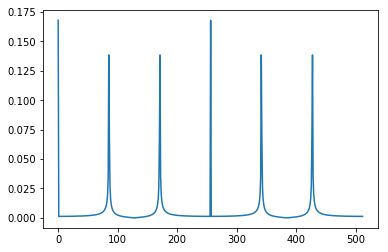

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def Hadamard(n):
    def Hn(H=np.array([[1, 1], [1, -1]], dtype=np.complex64), n=n):
        if n > 1:
            return Hn(H=np.kron(np.array([[1, 1], [1, -1]], dtype=np.complex64), H), n=n-1)
        return H

    return Hn(n=n)

def QFT(t):
    Q = np.zeros(shape=(2 ** t, 2 ** t), dtype=np.complex64)
    N = 2 ** t
    for i in range(N):
        for j in range(N):
            Q[i][j] = np.exp(np.pi * 2j * ((i * j) % N) / N)

    return Q

N = 21
t = 9
H = Hadamard(t)

reg1 = np.zeros(shape=(2 ** t), dtype=np.complex64)
reg2 = np.ones(shape=(2 ** t), dtype=np.complex64)
reg1[0] = 1
reg1 = H.dot(reg1)

for i in range(2 ** t):
    reg2[i] = 2 ** i % N

r = reg2[0]

for i in range(2 ** t):
    if reg2[i] != r:
        reg1[i] = 0

Q = QFT(9)
reg1 = np.linalg.inv(Q).dot(reg1)
print (abs(reg1))
print (abs(reg1[0]))
print (abs(reg1[85]))
print (abs(reg1[86]))

fig, ax = plt.subplots( nrows=1, ncols=1 )
ax.plot(abs(reg1))
fig.savefig('plot.png')
plt.show()